# import

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import os
import random as random
import math
import scipy.stats
from typing import Optional, Any, Union
from datetime import datetime, date, timedelta

from pytrends.request import TrendReq
import json

from gekko import GEKKO


# Max click model(with each keyword)

In [28]:
茶行 = [[11.73999758,0.332],[8.89955796,0.168],[6.746349934,0.082],[5.114100906,0.050],[3.876767191,0.033]]
鐵觀音 = [[3.650002081,0.332],[2.766900492,0.168],[2.097461361,0.082],[1.589990017,0.050],[1.205299083,0.033]]
木柵 = [[2.369996741,0.302],[1.796586688,0.216],[1.361910618,0.078],[1.032402469,0.043],[0.7826173341,0.023]]
茶葉 = [[9.859999683,0.244],[7.474417101,0.114],[5.666015497,0.071],[4.295148528,0.046],[3.255956657,0.036]]
送禮 = [[7.330000379,0.332],[5.556539751,0.168],[4.212159947,0.082],[3.19304679,0.050],[2.420503479,0.033]]
茶行maxclick = []
鐵觀音maxclick = []
木柵maxclick = []
茶葉maxclick = []
送禮maxclick = []

In [29]:
search = [4400,5400,6600,12100,5400]

In [30]:
print("茶行Maxclick:")
for i in range(5):
  茶行maxclick.append(math.floor(search[0] * 茶行[i][1]))
print(茶行maxclick)

茶行Maxclick:
[1460, 739, 360, 220, 145]


In [31]:
print("鐵觀音Maxclick:")
for i in range(5):
  鐵觀音maxclick.append(math.floor(search[1] * 鐵觀音[i][1]))
print(鐵觀音maxclick)

鐵觀音Maxclick:
[1792, 907, 442, 270, 178]


In [32]:
print("木柵Maxclick:")
for i in range(5):
  木柵maxclick.append(math.floor(search[2] * 木柵[i][1]))
print(木柵maxclick)

木柵Maxclick:
[1993, 1425, 514, 283, 151]


In [33]:
print("茶葉Maxclick:")
for i in range(5):
  茶葉maxclick.append(math.floor(search[3] * 茶葉[i][1]))
print(茶葉maxclick)

茶葉Maxclick:
[2952, 1379, 859, 556, 435]


In [34]:
print("送禮Maxclick:")
for i in range(5):
  送禮maxclick.append(math.floor(search[4] * 送禮[i][1]))
print(送禮maxclick)

送禮Maxclick:
[1792, 907, 442, 270, 178]


In [35]:
budget = [500,1000,1500,2000,2500]
茶行r1 = []
茶行r2 = []
茶行r3 = []
茶行r4 = []
茶行r5 = []
for i in range(5):
  茶行r1.append(min(math.floor(budget[0]/茶行[i][0]),茶行maxclick[i]))
  茶行r2.append(min(math.floor(budget[1]/茶行[i][0]),茶行maxclick[i]))
  茶行r3.append(min(math.floor(budget[2]/茶行[i][0]),茶行maxclick[i]))
  茶行r4.append(min(math.floor(budget[3]/茶行[i][0]),茶行maxclick[i]))
  茶行r5.append(min(math.floor(budget[4]/茶行[i][0]),茶行maxclick[i]))
print("Budget=500",茶行r1,"\nBudget=1000",茶行r2,"\nBudget=1500",茶行r3,"\nBudget=2000",茶行r4,"\nBudget=2500",茶行r5)
bestrank = []
bestrank.append(max(茶行r1))
bestrank.append(max(茶行r2))
bestrank.append(max(茶行r3))
bestrank.append(max(茶行r4))
bestrank.append(max(茶行r5))
print('Budget=500 Best rank:',茶行r1.index(max(茶行r1))+1," Clicks at best rank: ",bestrank[0])
print('Budget=1000 Best rank:',茶行r2.index(max(茶行r2))+1," Clicks at best rank: ",bestrank[1])
print('Budget=1500 Best rank:',茶行r3.index(max(茶行r3))+1," Clicks at best rank: ",bestrank[2])
print('Budget=2000 Best rank:',茶行r4.index(max(茶行r4))+1," Clicks at best rank: ",bestrank[3])
print('Budget=2500 Best rank:',茶行r5.index(max(茶行r5))+1," Clicks at best rank: ",bestrank[4])

Budget=500 [42, 56, 74, 97, 128] 
Budget=1000 [85, 112, 148, 195, 145] 
Budget=1500 [127, 168, 222, 220, 145] 
Budget=2000 [170, 224, 296, 220, 145] 
Budget=2500 [212, 280, 360, 220, 145]
Budget=500 Best rank: 5  Clicks at best rank:  128
Budget=1000 Best rank: 4  Clicks at best rank:  195
Budget=1500 Best rank: 3  Clicks at best rank:  222
Budget=2000 Best rank: 3  Clicks at best rank:  296
Budget=2500 Best rank: 3  Clicks at best rank:  360


In [36]:
鐵觀音r1 = []
鐵觀音r2 = []
鐵觀音r3 = []
鐵觀音r4 = []
鐵觀音r5 = []
for i in range(5):
  鐵觀音r1.append(min(math.floor(budget[0]/鐵觀音[i][0]),鐵觀音maxclick[i]))
  鐵觀音r2.append(min(math.floor(budget[1]/鐵觀音[i][0]),鐵觀音maxclick[i]))
  鐵觀音r3.append(min(math.floor(budget[2]/鐵觀音[i][0]),鐵觀音maxclick[i]))
  鐵觀音r4.append(min(math.floor(budget[3]/鐵觀音[i][0]),鐵觀音maxclick[i]))
  鐵觀音r5.append(min(math.floor(budget[4]/鐵觀音[i][0]),鐵觀音maxclick[i]))
print("Budget=500",鐵觀音r1,"\nBudget=1000",鐵觀音r2,"\nBudget=1500",鐵觀音r3,"\nBudget=2000",鐵觀音r4,"\nBudget=2500",鐵觀音r5)
bestrank = []
bestrank.append(max(鐵觀音r1))
bestrank.append(max(鐵觀音r2))
bestrank.append(max(鐵觀音r3))
bestrank.append(max(鐵觀音r4))
bestrank.append(max(鐵觀音r5))
print('Budget=500 Best rank:',鐵觀音r1.index(max(鐵觀音r1))+1," Clicks at best rank: ",bestrank[0])
print('Budget=1000 Best rank:',鐵觀音r2.index(max(鐵觀音r2))+1," Clicks at best rank: ",bestrank[1])
print('Budget=1500 Best rank:',鐵觀音r3.index(max(鐵觀音r3))+1," Clicks at best rank: ",bestrank[2])
print('Budget=2000 Best rank:',鐵觀音r4.index(max(鐵觀音r4))+1," Clicks at best rank: ",bestrank[3])
print('Budget=2500 Best rank:',鐵觀音r5.index(max(鐵觀音r5))+1," Clicks at best rank: ",bestrank[4])

Budget=500 [136, 180, 238, 270, 178] 
Budget=1000 [273, 361, 442, 270, 178] 
Budget=1500 [410, 542, 442, 270, 178] 
Budget=2000 [547, 722, 442, 270, 178] 
Budget=2500 [684, 903, 442, 270, 178]
Budget=500 Best rank: 4  Clicks at best rank:  270
Budget=1000 Best rank: 3  Clicks at best rank:  442
Budget=1500 Best rank: 2  Clicks at best rank:  542
Budget=2000 Best rank: 2  Clicks at best rank:  722
Budget=2500 Best rank: 2  Clicks at best rank:  903


In [37]:
木柵r1 = []
木柵r2 = []
木柵r3 = []
木柵r4 = []
木柵r5 = []
for i in range(5):
  木柵r1.append(min(math.floor(budget[0]/木柵[i][0]),木柵maxclick[i]))
  木柵r2.append(min(math.floor(budget[1]/木柵[i][0]),木柵maxclick[i]))
  木柵r3.append(min(math.floor(budget[2]/木柵[i][0]),木柵maxclick[i]))
  木柵r4.append(min(math.floor(budget[3]/木柵[i][0]),木柵maxclick[i]))
  木柵r5.append(min(math.floor(budget[4]/木柵[i][0]),木柵maxclick[i]))
print("Budget=500",木柵r1,"\nBudget=1000",木柵r2,"\nBudget=1500",木柵r3,"\nBudget=2000",木柵r4,"\nBudget=2500",木柵r5)
bestrank = []
bestrank.append(max(木柵r1))
bestrank.append(max(木柵r2))
bestrank.append(max(木柵r3))
bestrank.append(max(木柵r4))
bestrank.append(max(木柵r5))
print('Budget=500 Best rank:',木柵r1.index(max(木柵r1))+1," Clicks at best rank: ",bestrank[0])
print('Budget=1000 Best rank:',木柵r2.index(max(木柵r2))+1," Clicks at best rank: ",bestrank[1])
print('Budget=1500 Best rank:',木柵r3.index(max(木柵r3))+1," Clicks at best rank: ",bestrank[2])
print('Budget=2000 Best rank:',木柵r4.index(max(木柵r4))+1," Clicks at best rank: ",bestrank[3])
print('Budget=2500 Best rank:',木柵r5.index(max(木柵r5))+1," Clicks at best rank: ",bestrank[4])

Budget=500 [210, 278, 367, 283, 151] 
Budget=1000 [421, 556, 514, 283, 151] 
Budget=1500 [632, 834, 514, 283, 151] 
Budget=2000 [843, 1113, 514, 283, 151] 
Budget=2500 [1054, 1391, 514, 283, 151]
Budget=500 Best rank: 3  Clicks at best rank:  367
Budget=1000 Best rank: 2  Clicks at best rank:  556
Budget=1500 Best rank: 2  Clicks at best rank:  834
Budget=2000 Best rank: 2  Clicks at best rank:  1113
Budget=2500 Best rank: 2  Clicks at best rank:  1391


In [38]:
茶葉r1 = []
茶葉r2 = []
茶葉r3 = []
茶葉r4 = []
茶葉r5 = []
for i in range(5):
  茶葉r1.append(min(math.floor(budget[0]/茶葉[i][0]),茶葉maxclick[i]))
  茶葉r2.append(min(math.floor(budget[1]/茶葉[i][0]),茶葉maxclick[i]))
  茶葉r3.append(min(math.floor(budget[2]/茶葉[i][0]),茶葉maxclick[i]))
  茶葉r4.append(min(math.floor(budget[3]/茶葉[i][0]),茶葉maxclick[i]))
  茶葉r5.append(min(math.floor(budget[4]/茶葉[i][0]),茶葉maxclick[i]))
print("Budget=500",茶葉r1,"\nBudget=1000",茶葉r2,"\nBudget=1500",茶葉r3,"\nBudget=2000",茶葉r4,"\nBudget=2500",茶葉r5)
bestrank = []
bestrank.append(max(茶葉r1))
bestrank.append(max(茶葉r2))
bestrank.append(max(茶葉r3))
bestrank.append(max(茶葉r4))
bestrank.append(max(茶葉r5))
print('Budget=500 Best rank:',茶葉r1.index(max(茶葉r1))+1," Clicks at best rank: ",bestrank[0])
print('Budget=1000 Best rank:',茶葉r2.index(max(茶葉r2))+1," Clicks at best rank: ",bestrank[1])
print('Budget=1500 Best rank:',茶葉r3.index(max(茶葉r3))+1," Clicks at best rank: ",bestrank[2])
print('Budget=2000 Best rank:',茶葉r4.index(max(茶葉r4))+1," Clicks at best rank: ",bestrank[3])
print('Budget=2500 Best rank:',茶葉r5.index(max(茶葉r5))+1," Clicks at best rank: ",bestrank[4])

Budget=500 [50, 66, 88, 116, 153] 
Budget=1000 [101, 133, 176, 232, 307] 
Budget=1500 [152, 200, 264, 349, 435] 
Budget=2000 [202, 267, 352, 465, 435] 
Budget=2500 [253, 334, 441, 556, 435]
Budget=500 Best rank: 5  Clicks at best rank:  153
Budget=1000 Best rank: 5  Clicks at best rank:  307
Budget=1500 Best rank: 5  Clicks at best rank:  435
Budget=2000 Best rank: 4  Clicks at best rank:  465
Budget=2500 Best rank: 4  Clicks at best rank:  556


In [39]:
送禮r1 = []
送禮r2 = []
送禮r3 = []
送禮r4 = []
送禮r5 = []
for i in range(5):
  送禮r1.append(min(math.floor(budget[0]/送禮[i][0]),送禮maxclick[i]))
  送禮r2.append(min(math.floor(budget[1]/送禮[i][0]),送禮maxclick[i]))
  送禮r3.append(min(math.floor(budget[2]/送禮[i][0]),送禮maxclick[i]))
  送禮r4.append(min(math.floor(budget[3]/送禮[i][0]),送禮maxclick[i]))
  送禮r5.append(min(math.floor(budget[4]/送禮[i][0]),送禮maxclick[i]))
print("Budget=500",送禮r1,"\nBudget=1000",送禮r2,"\nBudget=1500",送禮r3,"\nBudget=2000",送禮r4,"\nBudget=2500",送禮r5)
bestrank = []
bestrank.append(max(送禮r1))
bestrank.append(max(送禮r2))
bestrank.append(max(送禮r3))
bestrank.append(max(送禮r4))
bestrank.append(max(送禮r5))
print('Budget=500 Best rank:',送禮r1.index(max(送禮r1))+1," Clicks at best rank: ",bestrank[0])
print('Budget=1000 Best rank:',送禮r2.index(max(送禮r2))+1," Clicks at best rank: ",bestrank[1])
print('Budget=1500 Best rank:',送禮r3.index(max(送禮r3))+1," Clicks at best rank: ",bestrank[2])
print('Budget=2000 Best rank:',送禮r4.index(max(送禮r4))+1," Clicks at best rank: ",bestrank[3])
print('Budget=2500 Best rank:',送禮r5.index(max(送禮r5))+1," Clicks at best rank: ",bestrank[4])

Budget=500 [68, 89, 118, 156, 178] 
Budget=1000 [136, 179, 237, 270, 178] 
Budget=1500 [204, 269, 356, 270, 178] 
Budget=2000 [272, 359, 442, 270, 178] 
Budget=2500 [341, 449, 442, 270, 178]
Budget=500 Best rank: 5  Clicks at best rank:  178
Budget=1000 Best rank: 4  Clicks at best rank:  270
Budget=1500 Best rank: 3  Clicks at best rank:  356
Budget=2000 Best rank: 3  Clicks at best rank:  442
Budget=2500 Best rank: 2  Clicks at best rank:  449


# Impression forcasting

In [ ]:
from google.colab import files
import pandas as pd
uploaded=files.upload()              # 上傳檔案

pd.read_excel('multiTimeline.xlsx')     # 開啟已經上傳之檔案


Saving multiTimeline.xlsx to multiTimeline.xlsx


,關鍵字,茶行,鐵觀音,木柵,茶葉,送禮
0,2021-06-20,12,7,43,57,20
1,2021-06-27,12,7,45,52,17
2,2021-07-04,11,8,43,56,18
3,2021-07-11,15,7,43,51,19
4,2021-07-18,11,7,42,48,18
5,2021-07-25,10,5,38,44,21
6,2021-08-01,9,6,43,56,24
7,2021-08-08,12,5,51,57,29
8,2021-08-15,14,7,58,64,30
9,2021-08-22,13,8,72,48,33


In [ ]:
df = pd.read_excel("multiTimeline.xlsx",  usecols=[ "關鍵字", "茶行","鐵觀音", "木柵","茶葉", "送禮" ])
print(df)

          關鍵字  茶行  鐵觀音   木柵  茶葉  送禮
0  2021-06-20  12    7   43  57  20
1  2021-06-27  12    7   45  52  17
2  2021-07-04  11    8   43  56  18
3  2021-07-11  15    7   43  51  19
4  2021-07-18  11    7   42  48  18
5  2021-07-25  10    5   38  44  21
6  2021-08-01   9    6   43  56  24
7  2021-08-08  12    5   51  57  29
8  2021-08-15  14    7   58  64  30
9  2021-08-22  13    8   72  48  33
10 2021-08-29  15    7   61  62  34
11 2021-09-05  15    8   52  60  44
12 2021-09-12  17    9   59  60  50
13 2021-09-19  16    7   64  59  28
14 2021-09-26  17    6   71  60  28
15 2021-10-03  16    6   70  61  25
16 2021-10-10  15    4   68  62  22
17 2021-10-17  16    7   65  56  28
18 2021-10-24  19    7   59  57  20
19 2021-10-31  17    6   72  67  20
20 2021-11-07  18    6   70  69  29
21 2021-11-14  17    7   74  65  28
22 2021-11-21  22    6   67  67  30
23 2021-11-28  20    7   72  63  28
24 2021-12-05  20    8   78  64  29
25 2021-12-12  19    5   71  59  41
26 2021-12-19  18    5   65 

In [ ]:
dd = pd.read_excel("multiTimeline.xlsx",  usecols=[ "關鍵字"])
ds = pd.read_excel("multiTimeline.xlsx",  usecols=[ "茶行"])
dtia = pd.read_excel("multiTimeline.xlsx",  usecols=[ "鐵觀音"])
dm = pd.read_excel("multiTimeline.xlsx",  usecols=[  "木柵"])
dt = pd.read_excel("multiTimeline.xlsx",  usecols=[ "茶葉" ])
dg = pd.read_excel("multiTimeline.xlsx",  usecols=[  "送禮" ])

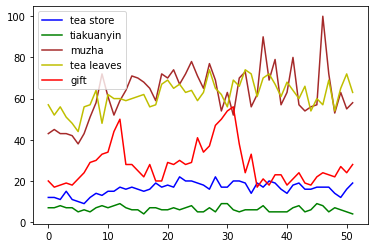

In [ ]:
import matplotlib.pyplot as plt


plt.plot( ds, label='tea store', color='blue')
plt.plot( dtia, label='tiakuanyin', color='g')
plt.plot( dm, label='muzha', color='brown')
plt.plot( dt, label='tea leaves', color='y')
plt.plot( dg, label='gift', color='r')
plt.legend()

In [ ]:
def moving_average(i, extra_periods=1, n=3):
    
    # Historical period length
    cols = len(i) 
    # Append np.nan into the demand array to cover future periods
    #np.zeros? actual or initial?
    i = np.append(i,[np.nan]*extra_periods) 
    # Define the forecast array
    f = np.full(cols+extra_periods,np.nan)
    
    # Create all the n+1 forecast until end of historical period
    for t in range(n,cols):
        f[t] = np.mean(i[t-n:t])

     
    # Forecast for all extra periods
    # given t=20-->how is it?
    f[t+1:] = np.mean(i[t-n+1:t+1])
    # All extra periods with same forecasts?


    
               
    # Return a dataframe from array data
    df = pd.DataFrame.from_dict({'Impression':i,'Forecast':f,'Error':i-f})
  
    return df

In [ ]:
d=ds #茶行
result=moving_average(d,extra_periods=4,n=3)
# All extra periods with same forecasts? very similar to f[21]-->can use the simplified version
# dataframe:https://www.runoob.com/pandas/pandas-dataframe.html
print(result['Forecast'])

0           NaN
1           NaN
2           NaN
3     11.666667
4     12.666667
5     12.333333
6     12.000000
7     10.000000
8     10.333333
9     11.666667
10    13.000000
11    14.000000
12    14.333333
13    15.666667
14    16.000000
15    16.666667
16    16.333333
17    16.000000
18    15.666667
19    16.666667
20    17.333333
21    18.000000
22    17.333333
23    19.000000
24    19.666667
25    20.666667
26    19.666667
27    19.000000
28    17.666667
29    18.666667
30    18.333333
31    18.666667
32    18.000000
33    19.000000
34    19.666667
35    17.666667
36    17.333333
37    16.666667
38    18.666667
39    18.666667
40    18.333333
41    16.333333
42    16.000000
43    17.000000
44    17.666667
45    17.000000
46    16.333333
47    16.666667
48    17.000000
49    16.000000
50    14.333333
51    14.000000
52    15.666667
53    15.666667
54    15.666667
55    15.666667
Name: Forecast, dtype: float64


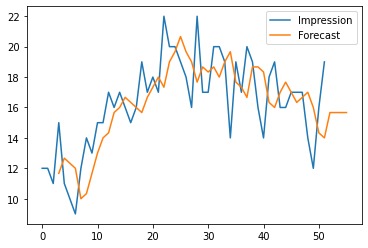

In [ ]:
result[['Impression','Forecast']].plot()

In [ ]:
#3-period MA for future 4 periods
d=dtia #鐵觀音
result=moving_average(d,extra_periods=4,n=3)
# All extra periods with same forecasts? very similar to f[21]-->can use the simplified version
# dataframe:https://www.runoob.com/pandas/pandas-dataframe.html
print(result['Forecast'])

0          NaN
1          NaN
2          NaN
3     7.333333
4     7.333333
5     7.333333
6     6.333333
7     6.000000
8     5.333333
9     6.000000
10    6.666667
11    7.333333
12    7.666667
13    8.000000
14    8.000000
15    7.333333
16    6.333333
17    5.333333
18    5.666667
19    6.000000
20    6.666667
21    6.333333
22    6.333333
23    6.333333
24    6.666667
25    7.000000
26    6.666667
27    6.000000
28    5.666667
29    5.666667
30    7.000000
31    7.666667
32    8.000000
33    6.666667
34    5.666667
35    5.666667
36    6.000000
37    6.666667
38    6.333333
39    6.000000
40    5.000000
41    5.000000
42    5.666667
43    6.666667
44    6.666667
45    6.333333
46    6.666667
47    7.666667
48    7.333333
49    6.666667
50    6.000000
51    6.000000
52    5.000000
53    5.000000
54    5.000000
55    5.000000
Name: Forecast, dtype: float64


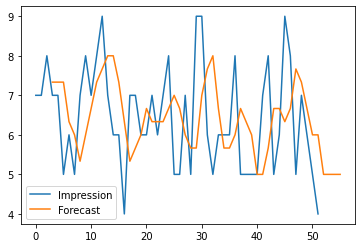

In [ ]:
result[['Impression','Forecast']].plot()

In [ ]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt 
#MA2
def kpi_simple(df):
    SSE =(df['Error']**2).sum()
    MSE =(df['Error']**2).mean()
    print('SSE: {:0.2f}'.format(SSE))
    print('MSE: {:0.2f}'.format(MSE))
d=dtia
case1=moving_average(d,extra_periods=1,n=3)
print(case1['Error']) #df.sum() ignore NaN
kpi_simple(case1)
case2=moving_average(d,extra_periods=1,n=4)
kpi_simple(case2)




0          NaN
1          NaN
2          NaN
3    -0.333333
4    -0.333333
5    -2.333333
6    -0.333333
7    -1.000000
8     1.666667
9     2.000000
10    0.333333
11    0.666667
12    1.333333
13   -1.000000
14   -2.000000
15   -1.333333
16   -2.333333
17    1.666667
18    1.333333
19    0.000000
20   -0.666667
21    0.666667
22   -0.333333
23    0.666667
24    1.333333
25   -2.000000
26   -1.666667
27    1.000000
28   -0.666667
29    3.333333
30    2.000000
31   -1.666667
32   -3.000000
33   -0.666667
34    0.333333
35    0.333333
36    2.000000
37   -1.666667
38   -1.333333
39   -1.000000
40    0.000000
41    2.000000
42    2.333333
43   -1.666667
44   -0.666667
45    2.666667
46    1.333333
47   -2.666667
48   -0.333333
49   -0.666667
50   -1.000000
51   -2.000000
52         NaN
Name: Error, dtype: float64
SSE: 115.44
MSE: 2.36
SSE: 116.19
MSE: 2.42


In [ ]:
from traitlets.traitlets import directional_link
def seasonal_ES(dtia, slen=4, extra_periods=1, alpha=0.6, beta=0.2):

    cols = len(dtia) # Historical period length
    d = np.append(dtia,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    # components initialization     
    f,E,S = np.full((3,cols+extra_periods),np.nan)
        
    # initialization
    for i in range(slen):
      E[i] = d[:slen].mean()
      S[i] = d[i]-E[i]             

                
    # Create all the t+1 forecast
    for t in range(slen,cols):
        f[t] = E[t-1] +  S[t-slen]       
        E[t] = alpha*(d[t]-S[t-slen]) + (1-alpha)*(E[t-1])               
        S[t] = beta*(d[t]-E[t]) + (1-beta)*S[t-slen] 
        
    # Forecast for all extra periods
    for t in range(cols,cols+extra_periods):
      f[t] = E[cols-1] + S[t-slen]
                      
    df = pd.DataFrame.from_dict({'Impression':i,'Forecast':f,'Level':E,'Season':S,'Error':d-f})

    return df

In [ ]:
def seasonal_opti(dtia, extra_periods=4):  
  
    params = []  # contains all the different parameter sets  
    KPIs = []   # contains the results of each model  
    dfs = []  # contains all the dataframes returned by the different models  
    data=[0.05,0.1,0.2,0.3,0.4,0.5,0.6]
    for alpha in data:
      for beta in data:  
          
        df = seasonal_ES(d,extra_periods=extra_periods,alpha=alpha,beta=beta) 
        params.append(f'Seasonal additive, alpha: {alpha}, beta:{beta}')  
        dfs.append(df)  
        MAE = df['Error'].abs().mean()  
        KPIs.append(MAE)  
                        
     
    mini = np.argmin(KPIs)   
    print(f'Best solution found for {params[mini]} MAE of',round(KPIs[mini],2))  

    return dfs[mini]  

d=dtia
result=seasonal_opti(d)

Best solution found for Seasonal additive, alpha: 0.1, beta:0.05 MAE of 1.24


    Impression  Forecast     Level    Season     Error
0            3       NaN  7.250000 -0.250000       NaN
1            3       NaN  7.250000 -0.250000       NaN
2            3       NaN  7.250000  0.750000       NaN
3            3       NaN  7.250000 -0.250000       NaN
4            3  7.000000  7.250000 -0.250000  0.000000
5            3  7.000000  7.050000 -0.340000 -2.000000
6            3  7.800000  6.870000  0.669000 -1.800000
7            3  6.620000  6.708000 -0.322900 -1.620000
8            3  6.458000  6.762200 -0.225610  0.542000
9            3  6.422200  6.919980 -0.268999  1.577800
10           3  7.588980  6.861082  0.642496 -0.588980
11           3  6.538182  7.007264 -0.257118  1.461818
12           3  6.781654  7.229098 -0.125784  2.218346
13           3  6.960099  7.233088 -0.267203  0.039901
14           3  7.875584  7.045530  0.558095 -1.875584
15           3  6.788412  6.966689 -0.292597 -0.788412
16           3  6.840904  6.682598 -0.253625 -2.840904
17        

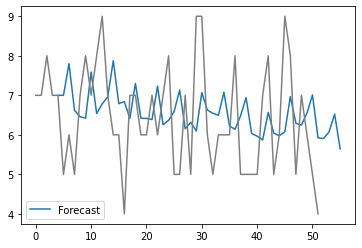

In [ ]:
ts=dtia

print(result)
kpi_simple(result)
result[['Forecast']].plot()
plt.plot( dtia, label='tiakuanyin', color='grey')

In [ ]:
#3-period MA for future 4 periods
d=dm #木柵
result=moving_average(d,extra_periods=4,n=3)
# All extra periods with same forecasts? very similar to f[21]-->can use the simplified version
# dataframe:https://www.runoob.com/pandas/pandas-dataframe.html
print(result['Forecast'])

0           NaN
1           NaN
2           NaN
3     43.666667
4     43.666667
5     42.666667
6     41.000000
7     41.000000
8     44.000000
9     50.666667
10    60.333333
11    63.666667
12    61.666667
13    57.333333
14    58.333333
15    64.666667
16    68.333333
17    69.666667
18    67.666667
19    64.000000
20    65.333333
21    67.000000
22    72.000000
23    70.333333
24    71.000000
25    72.333333
26    73.666667
27    71.333333
28    71.000000
29    70.333333
30    66.666667
31    62.000000
32    56.333333
33    61.666667
34    65.000000
35    66.333333
36    63.666667
37    69.333333
38    73.666667
39    79.333333
40    68.333333
41    66.333333
42    66.666667
43    66.666667
44    63.666667
45    55.666667
46    55.666667
47    71.000000
48    76.333333
49    75.000000
50    62.666667
51    57.000000
52    58.666667
53    58.666667
54    58.666667
55    58.666667
Name: Forecast, dtype: float64


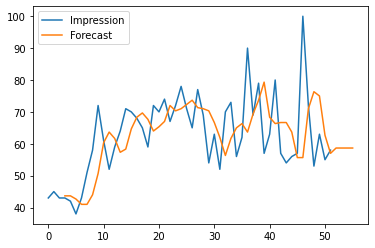

In [ ]:
result[['Impression','Forecast']].plot()

In [ ]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt 
#MA2
def kpi_simple(df):
    SSE =(df['Error']**2).sum()
    MSE =(df['Error']**2).mean()
    print('SSE: {:0.2f}'.format(SSE))
    print('MSE: {:0.2f}'.format(MSE))
d=dm
case1=moving_average(d,extra_periods=1,n=3)
print(case1['Error']) #df.sum() ignore NaN
kpi_simple(case1)
case2=moving_average(d,extra_periods=1,n=4)
kpi_simple(case2)




0           NaN
1           NaN
2           NaN
3     -0.666667
4     -1.666667
5     -4.666667
6      2.000000
7     10.000000
8     14.000000
9     21.333333
10     0.666667
11   -11.666667
12    -2.666667
13     6.666667
14    12.666667
15     5.333333
16    -0.333333
17    -4.666667
18    -8.666667
19     8.000000
20     4.666667
21     7.000000
22    -5.000000
23     1.666667
24     7.000000
25    -1.333333
26    -8.666667
27     5.666667
28    -2.000000
29   -16.333333
30    -3.666667
31   -10.000000
32    13.666667
33    11.333333
34    -9.000000
35    -4.333333
36    26.333333
37    -0.333333
38     5.333333
39   -22.333333
40    -5.333333
41    13.666667
42    -9.666667
43   -12.666667
44    -7.666667
45     1.333333
46    44.333333
47     1.000000
48   -23.333333
49   -12.000000
50    -7.666667
51     1.000000
52          NaN
Name: Error, dtype: float64
SSE: 6839.00
MSE: 139.57
SSE: 6775.38
MSE: 141.15


In [ ]:
def seasonal_ES(dm, slen=4, extra_periods=1, alpha=0.6, beta=0.2):

    cols = len(dm) # Historical period length
    d = np.append(dm,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    # components initialization     
    f,E,S = np.full((3,cols+extra_periods),np.nan)
        
    # initialization
    for i in range(slen):
      E[i] = d[:slen].mean()
      S[i] = d[i]-E[i]             

                
    # Create all the t+1 forecast
    for t in range(slen,cols):
        f[t] = E[t-1] +  S[t-slen]       
        E[t] = alpha*(d[t]-S[t-slen]) + (1-alpha)*(E[t-1])               
        S[t] = beta*(d[t]-E[t]) + (1-beta)*S[t-slen] 
        
    # Forecast for all extra periods
    for t in range(cols,cols+extra_periods):
      f[t] = E[cols-1] + S[t-slen]
                      
    df = pd.DataFrame.from_dict({'Impression':i,'Forecast':f,'Level':E,'Season':S,'Error':d-f})

    return df

In [ ]:
def seasonal_opti(dm, extra_periods=4):  
  
    params = []  # contains all the different parameter sets  
    KPIs = []   # contains the results of each model  
    dfs = []  # contains all the dataframes returned by the different models  
    data=[0.05,0.1,0.2,0.3,0.4,0.5,0.6]
    for alpha in data:
      for beta in data:  
          
        df = seasonal_ES(d,extra_periods=extra_periods,alpha=alpha,beta=beta) 
        params.append(f'Seasonal additive, alpha: {alpha}, beta:{beta}')  
        dfs.append(df)  
        MAE = df['Error'].abs().mean()  
        KPIs.append(MAE)  
                        
     
    mini = np.argmin(KPIs)   
    print(f'Best solution found for {params[mini]} MAE of',round(KPIs[mini],2))  

    return dfs[mini]  

d=dm
df=seasonal_opti(d)

Best solution found for Seasonal additive, alpha: 0.4, beta:0.05 MAE of 8.48


    Impression   Forecast      Level    Season      Error
0            3        NaN  43.500000 -0.500000        NaN
1            3        NaN  43.500000  1.500000        NaN
2            3        NaN  43.500000 -0.500000        NaN
3            3        NaN  43.500000 -0.500000        NaN
4            3  43.000000  43.100000 -0.530000  -1.000000
5            3  44.600000  40.460000  1.302000  -6.600000
6            3  39.960000  41.676000 -0.408800   3.040000
7            3  41.176000  45.605600 -0.205280   9.824000
8            3  45.075600  50.775360 -0.142268  12.924400
9            3  52.077360  58.744416  1.899679  19.922640
10           3  58.335616  59.810170 -0.328868   2.664384
11           3  59.604890  56.768214 -0.433427  -7.604890
12           3  56.625946  57.717835 -0.071046   2.374054
13           3  59.617515  59.470830  2.031154   4.382485
14           3  59.141961  64.214045  0.026873  11.858039
15           3  63.780618  66.701798 -0.246845   6.219382
16           3

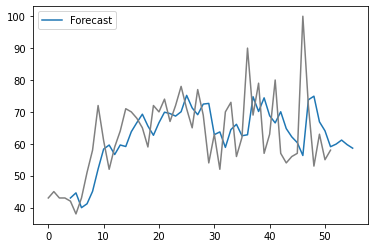

In [ ]:
ts=dm
result = seasonal_ES(dm, slen=4, extra_periods=4, alpha=0.4, beta=0.05)
print(result)
kpi_simple(result)
result[['Forecast']].plot()
plt.plot( dm, label='muzha', color='grey')

In [ ]:
#3-period MA for future 4 periods
d=dt #茶葉
result=moving_average(d,extra_periods=4,n=3)
# All extra periods with same forecasts? very similar to f[21]-->can use the simplified version
# dataframe:https://www.runoob.com/pandas/pandas-dataframe.html
print(result['Forecast'])

0           NaN
1           NaN
2           NaN
3     55.000000
4     53.000000
5     51.666667
6     47.666667
7     49.333333
8     52.333333
9     59.000000
10    56.333333
11    58.000000
12    56.666667
13    60.666667
14    59.666667
15    59.666667
16    60.000000
17    61.000000
18    59.666667
19    58.333333
20    60.000000
21    64.333333
22    67.000000
23    67.000000
24    65.000000
25    64.666667
26    62.000000
27    62.000000
28    65.333333
29    67.333333
30    67.000000
31    61.000000
32    62.333333
33    63.666667
34    69.666667
35    70.666667
36    69.000000
37    67.666667
38    67.666667
39    69.666667
40    66.666667
41    65.333333
42    64.333333
43    64.000000
44    63.333333
45    60.000000
46    60.000000
47    57.000000
48    62.000000
49    60.000000
50    62.666667
51    63.666667
52    66.666667
53    66.666667
54    66.666667
55    66.666667
Name: Forecast, dtype: float64


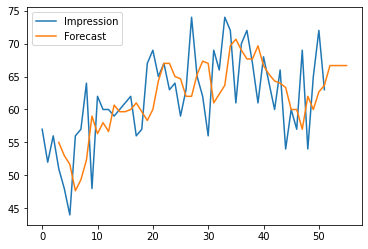

In [ ]:
result[['Impression','Forecast']].plot()

In [ ]:
#3-period MA for future 4 periods
d=dg #送禮
result=moving_average(d,extra_periods=4,n=3)
# All extra periods with same forecasts? very similar to f[21]-->can use the simplified version
# dataframe:https://www.runoob.com/pandas/pandas-dataframe.html
print(result['Forecast'])

0           NaN
1           NaN
2           NaN
3     18.333333
4     18.000000
5     18.333333
6     19.333333
7     21.000000
8     24.666667
9     27.666667
10    30.666667
11    32.333333
12    37.000000
13    42.666667
14    40.666667
15    35.333333
16    27.000000
17    25.000000
18    25.000000
19    23.333333
20    22.666667
21    23.000000
22    25.666667
23    29.000000
24    28.666667
25    29.000000
26    32.666667
27    34.666667
28    37.333333
29    39.333333
30    44.666667
31    50.333333
32    53.333333
33    49.333333
34    39.333333
35    31.666667
36    24.666667
37    23.666667
38    18.666667
39    20.666667
40    21.333333
41    21.333333
42    20.666667
43    21.000000
44    21.333333
45    20.333333
46    19.666667
47    21.333333
48    23.000000
49    23.000000
50    24.000000
51    24.333333
52    26.333333
53    26.333333
54    26.333333
55    26.333333
Name: Forecast, dtype: float64


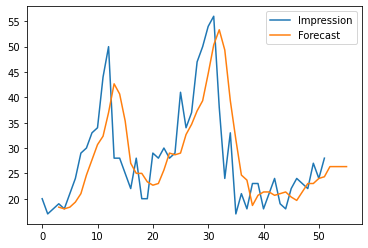

In [ ]:
result[['Impression','Forecast']].plot()

# RPC Stimulation

1.購買轉換率





In [17]:
#設定空清單

#大寫
K = 5 #共有5個關鍵字
S = 5000 #總共做5000次模擬

#每個關鍵字都有自己的轉換率，各自模擬5000次的表
internet_conversion_rate = np.zeros((K,S)) 
shop_conversion_rate = np.zeros((K,S))

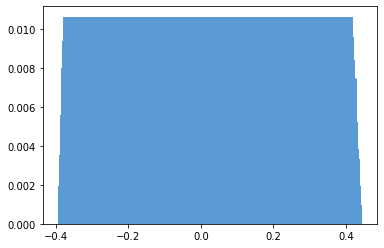

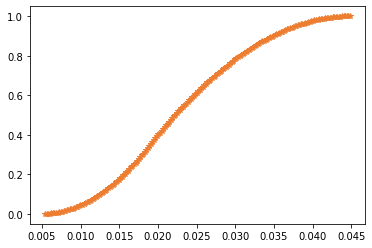

In [18]:
#網路購買轉換率 --> triangular 分配，模擬5000次

for k in range(K):
  for s in range(S):
    internet_conversion_rate[k,s] = np.random.triangular(0.005, 0.0191, 0.045)
    shop_conversion_rate[k,s] = np.random.triangular(0.005, 0.0191, 0.045)

#internet_conversion_rate畫圖
hist,bin_edges = np.histogram(internet_conversion_rate,bins=200)
plt.bar(bin_edges[1:],hist/sum(hist),color='#5B9BD5')
plt.show() 

cdf = np.cumsum(hist/sum(hist))
plt.plot(bin_edges[1:],cdf,'-*',color='#ED7D31')



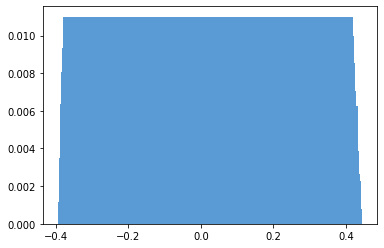

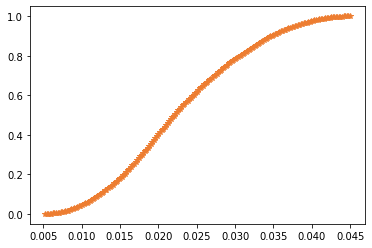

In [19]:
#shop_conversion_rate畫圖
hist,bin_edges = np.histogram(shop_conversion_rate,bins=200)
plt.bar(bin_edges[1:],hist/sum(hist),color='#5B9BD5')
plt.show() 

cdf = np.cumsum(hist/sum(hist))
plt.plot(bin_edges[1:],cdf,'-*',color='#ED7D31')

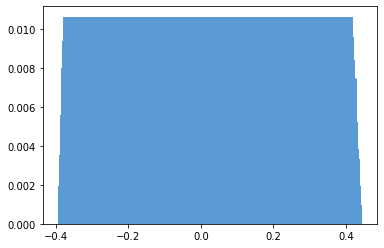

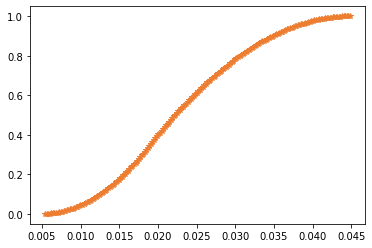

In [20]:
#實體購買轉換率 --> triangular 分配，模擬5000次
shop_conversion_rate = np.random.triangular(0.005, 0.0191, 0.045, 5000)
hist,bin_edges = np.histogram(internet_conversion_rate,bins=200)
plt.bar(bin_edges[1:],hist/sum(hist),color='#5B9BD5')
plt.show() 
cdf = np.cumsum(hist/sum(hist))
plt.plot(bin_edges[1:],cdf,'-*',color='#ED7D31')

2.每單位購買人數消費均價

In [21]:
#設定空清單

#大寫
K = 5 #共有5個關鍵字
S = 5000 #總共做5000次模擬

#設定各關鍵字基礎價格
internet_avg_price = [497.12, 150, 497.12, 572.7592593, 25572.75926]
shop_avg_price = [596.544, 600, 596.544, 687.3111111 ,20458.20741]

#每個關鍵字都有自己的購買均價，各自模擬5000次的表
internet_price = np.zeros((K,S)) 
shop_price = np.zeros((K,S))

In [22]:
#填入價格
for k in range(K):
  for s in range(S):
      internet_price[k,s] = np.random.normal(internet_avg_price[k], 5)
      shop_price[k,s] = np.random.normal(shop_avg_price[k], 5)

3. 網路購買人數比率模擬

In [23]:
#設定空清單

#大寫
K = 5 #共有5個關鍵字
S = 5000 #總共做5000次模擬

#每個關鍵字都有自己的轉換率，各自模擬5000次的表
internet_prob = np.zeros((K,S)) 
shop_prob = np.zeros((K,S))

In [24]:
# 輸入0~1亂數當作機率

for k in range(K):
  for s in range(S):
    internet_prob[k,s] = random.uniform(0, 1)
    shop_prob[k,s] = 1 - internet_prob[k,s]

print(internet_prob)
print(shop_prob)

[[0.61154818 0.98617017 0.37876859 ... 0.994268   0.51996046 0.08412889]
 [0.7394142  0.94079898 0.62529737 ... 0.20727946 0.71132337 0.65566848]
 [0.22857784 0.02418573 0.55313184 ... 0.54048626 0.91896962 0.38719156]
 [0.98949181 0.41116416 0.50459832 ... 0.38708432 0.89109384 0.36844767]
 [0.25945517 0.63515575 0.48444719 ... 0.50429712 0.95747773 0.58497631]]
[[0.38845182 0.01382983 0.62123141 ... 0.005732   0.48003954 0.91587111]
 [0.2605858  0.05920102 0.37470263 ... 0.79272054 0.28867663 0.34433152]
 [0.77142216 0.97581427 0.44686816 ... 0.45951374 0.08103038 0.61280844]
 [0.01050819 0.58883584 0.49540168 ... 0.61291568 0.10890616 0.63155233]
 [0.74054483 0.36484425 0.51555281 ... 0.49570288 0.04252227 0.41502369]]


計算RPC：將全部表格組合而成

In [25]:
#設定空表格
internet_RPC = np.zeros((K,S)) 
shop_RPC = np.zeros((K,S)) 
total_RPC = np.zeros((K,S))
 
mean_RPC= np.zeros(K)


In [26]:
internet_RPC = np.multiply(internet_conversion_rate, internet_price, internet_prob)
shop_RPC = np.multiply(shop_conversion_rate, shop_price, shop_prob)

for k in range(K):
  for s in range(S):
    total_RPC[k,s] = internet_RPC[k,s] + shop_prob[k,s]

total_RPC

array([[  14.52785977,   19.98624713,   32.40491132, ...,   38.09109471,
          17.18030211,   32.98831443],
       [  12.20745315,   11.21764677,   19.45689311, ...,   23.1182937 ,
           7.74615805,   16.4819027 ],
       [  17.59599478,   18.12703173,   29.22392128, ...,   30.48383724,
          16.61915572,   22.03087397],
       [  32.41968053,   18.56037893,   31.49737031, ...,   41.17281428,
          16.07666853,   20.70649308],
       [ 897.95048815,  760.57494526, 1311.52688523, ..., 1091.193776  ,
         737.69247875, 1215.64058945]])

In [27]:
for k in range(K):
  for s in range(S):
    mean_RPC[k]= np.mean(total_RPC[k,s])

print(mean_RPC)

[  32.98831443   16.4819027    22.03087397   20.70649308 1215.64058945]


# CPC & CTR優化




Text(0, 0.5, 'CPC')

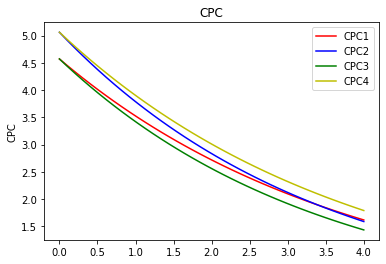

In [40]:
def CPC1(x):
  y = 4.57*math.pow(2.71818,-0.26*x)
  return y

def CPC2(x):
  y = 5.06*math.pow(2.71818,-0.29*x)
  return y

def CPC3(x):
  y = 4.57*math.pow(2.71818,-0.29*x)
  return y

def CPC4(x):
  y = 5.06*math.pow(2.71818,-0.26*x)
  return y

X = np.linspace(0,4,40)
y1 = [CPC1(x)for x in X]
y2 = [CPC2(x)for x in X]
y3 = [CPC3(x)for x in X]
y4 = [CPC4(x)for x in X]
plt.plot(X,y1,label='CPC1',color = 'r')
plt.plot(X,y2,label='CPC2',color = 'b')
plt.plot(X,y3,label='CPC3',color = 'g')
plt.plot(X,y4,label='CPC4',color = 'y')

plt.legend(loc='best')
plt.title("CPC")
plt.xlabel("")
plt.ylabel("CPC")

Text(0, 0.5, 'CTR')

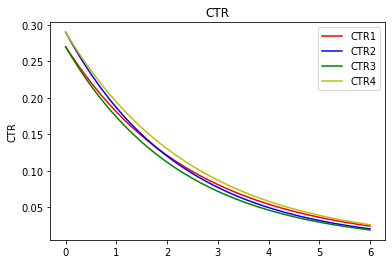

In [41]:
def CTR1(x):
  y = 0.27*math.pow(2.71818,-0.4*x)
  return y

def CTR2(x):
  y = 0.29*math.pow(2.71818,-0.44*x)
  return y

def CTR3(x):
  y = 0.27*math.pow(2.71818,-0.44*x)
  return y

def CTR4(x):
  y = 0.29*math.pow(2.71818,-0.4*x)
  return y

X = np.linspace(0,6,60)
y1 = [CTR1(x)for x in X]
y2 = [CTR2(x)for x in X]
y3 = [CTR3(x)for x in X]
y4 = [CTR4(x)for x in X]
plt.plot(X,y1,label='CTR1',color = 'r')
plt.plot(X,y2,label='CTR2',color = 'b')
plt.plot(X,y3,label='CTR3',color = 'g')
plt.plot(X,y4,label='CTR4',color = 'y')

plt.legend(loc='best')
plt.title("CTR")
plt.xlabel("")
plt.ylabel("CTR")

# Max click model(With all keywords & uncertain IMP)

In [32]:
def Create_Google_trends_hunter(
    geo: str = "zh-TW", # The geo lozation you want to search.
    
)-> TrendReq:
    
    return 0


def get_Converted_WholeTime_str(whole_type: str, whole_period: Union[int, str])-> str:
    """
    使用者選擇某個全時段，如全年、全月等等，則用到此轉換。

    Args:
        whole_type (str): 類別，如years or months
        whole_period (Union[int, str]): 時間區間，年如2023、月如2022-9

    Returns:
        str: Valid date string in Google Trends
    """    

    try:
        if whole_type == 'years':
            start_date = f"{whole_period}-01-01"
            end_date = f"{whole_period}-12-31"
            return f"{start_date} {end_date}"
        elif whole_type == 'months':
            try:
                year, month = map(int, whole_period.split('-'))
                start_date = f"{year}-{month:02d}-01"
                last_day = date(year, month, 1).replace(day=1, month=month % 12 + 1) - timedelta(days=1)
                end_date = f"{year}-{month:02d}-{last_day.day:02d}"
                return f"{start_date} {end_date}"
            except ValueError as e:
                print(f"Error in whole_period, the error is:{e}.")
        else:
            return "Invalid input in get_Converted_WholeTime_str. Please enter a valid one."

    except Exception as e:
        print(f"Error in get_Converted_WholeTime_str, the error is:{e}.")


def get_Converted_fromToday_str(fromToday_period_type: str, fromToday_period_num: Union[int, str])-> str:
    """
    使用者選擇某個全時段，如全年、全月等等，則用到此轉換。

    Args:
        whole_type (str): 類別，如年 or 月
        whole_period (Union[int, str]): 時間區間，年如2023、月如2022-9

    Returns:
        str: Valid date string in Google Trends
    """    

    try:
        if whole_type == '年':
            start_date = f"{whole_period}-01-01"
            end_date = f"{whole_period}-12-31"
            return f"{start_date} {end_date}"
        elif whole_type == '月':
            try:
                year, month = map(int, whole_period.split('-'))
                start_date = f"{year}-{month:02d}-01"
                last_day = date(year, month, 1).replace(day=1, month=month % 12 + 1) - timedelta(days=1)
                end_date = f"{year}-{month:02d}-{last_day.day:02d}"
                return f"{start_date} {end_date}"
            except ValueError as e:
                print(f"Error in whole_period, the error is:{e}.")
        else:
            return "Invalid input in get_Converted_WholeTime_str. Please enter a valid one."

    except Exception as e:
        print(f"Error in get_Converted_WholeTime_str, the error is:{e}.")




def Mapping_Google_trends_date(
    selectTime_type: int,
    spec_startDateTime: Optional[str] = '2023-08-18',
    spec_endDateTime: Optional[str] = '2023-09-18',
    fromToday_period_type: Optional[str] = 'month',
    fromToday_period_num: Optional[int] = 1,
    whole_type: Optional[str] = 'year',
    whole_period: Optional[int] = 2023
)-> str:
    """
    分為四種：
    - 所有時間 -> 0
    - 全年 -> 1
    - 從今至之前xx -> 2
    - 開始時間~結束時間 -> 3
    
    
    """

    match selectTime_type:
        case 0: # 所有時間
            return 'all'
        case 1: # 全xx
            converted_date = get_Converted_WholeTime_str(whole_type, whole_period)
            return converted_date
        case 2: # 從今至之前xx
            

            


    # if ( == 0): # Users choose the specific datetimes
        
    # return "ok" 
        


def GET_Google_trends_data(
    timeframe: dict, # The time spread you want to search.
    kw_list: list = [], # Max 5 keywords and MIN 1 Keyword you can search.
    categorie_num: int = 0, # We set the default cat is 0, which means find the trends in ALL categories. You can find your own categories you want in this url: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
    geo: str = 'TW', # The geo lozation you want to search. you can change any geos you want. e.g. US, CN....You can find your own two-num geo numbers in this url: https://www.webdesigntooler.com/internet-country-code-table 
    specTime_or_not: bool,
)-> json:
    

IndentationError: expected an indented block after function definition on line 1 (1175112502.py, line 7)

In [68]:

def get_Converted_fromToday_str(fromToday_period_type: str, fromToday_period_num: Union[int, str])-> str:
    """
    使用者選擇從現在開始到某個時間區間之間的轉換器。

    Args:
        fromToday_period_type (str): 類別，如年 or 月
        fromToday_period_num (Union[int, str]): 時間區間，年如3、月如5、日如9、小時如3

    Returns:
        str: Valid date string in Google Trends
    """    

    try:
        match fromToday_period_type:
            case 'hours':
                start_str = f"now"
                end_str = f"{fromToday_period_num}-H"
                return f"{start_str} {end_str}"
            case 'days':
                start_str = f"now"
                end_str = f"{fromToday_period_num}-d"
                return f"{start_str} {end_str}"
            case 'months':
                start_str = f"today"
                end_str = f"{fromToday_period_num}-m"
                return f"{start_str} {end_str}"
            case 'years':
                start_str = f"today"
                end_str = f"{fromToday_period_num}-y"
                return f"{start_str} {end_str}"
            case _:
                return "Invalid input in fromToday_period_type. Please enter a valid one."
        
    except ValueError as e:
        print(f"Error in whole_period, the error is:{e}.")

    except Exception as e:
        print(f"Error in get_Converted_WholeTime_str, the error is:{e}.")


get_Converted_fromToday_str('years', 4)

'today 4-y'

In [73]:
pytrend = TrendReq(hl='en-US', tz=360)
pytrend.build_payload(kw_list=['cnn', 'bbc'], cat=0, timeframe='today 1-m', geo='BT', gprop='')
pytrend.interest_over_time()
preload = json.loads(pytrend.interest_over_time().to_json(orient='table'))['data']
print(json.dumps(preload, ensure_ascii=False))

c:\SideProjects\SEO_Optimizations\venv\Lib\site-packages\pytrends\request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(


[{"date": "2023-08-17T00:00:00.000", "cnn": 0, "bbc": 30, "isPartial": false}, {"date": "2023-08-18T00:00:00.000", "cnn": 18, "bbc": 30, "isPartial": false}, {"date": "2023-08-19T00:00:00.000", "cnn": 0, "bbc": 0, "isPartial": false}, {"date": "2023-08-20T00:00:00.000", "cnn": 0, "bbc": 0, "isPartial": false}, {"date": "2023-08-21T00:00:00.000", "cnn": 0, "bbc": 0, "isPartial": false}, {"date": "2023-08-22T00:00:00.000", "cnn": 0, "bbc": 0, "isPartial": false}, {"date": "2023-08-23T00:00:00.000", "cnn": 0, "bbc": 100, "isPartial": false}, {"date": "2023-08-24T00:00:00.000", "cnn": 0, "bbc": 30, "isPartial": false}, {"date": "2023-08-25T00:00:00.000", "cnn": 0, "bbc": 20, "isPartial": false}, {"date": "2023-08-26T00:00:00.000", "cnn": 0, "bbc": 0, "isPartial": false}, {"date": "2023-08-27T00:00:00.000", "cnn": 18, "bbc": 0, "isPartial": false}, {"date": "2023-08-28T00:00:00.000", "cnn": 0, "bbc": 24, "isPartial": false}, {"date": "2023-08-29T00:00:00.000", "cnn": 0, "bbc": 20, "isPartia

c:\SideProjects\SEO_Optimizations\venv\Lib\site-packages\pytrends\request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(


In [26]:
pytrend = TrendReq(hl='zh-TW', tz=360)
pytrend.build_payload(kw_list=['cnn', 'bbc'], cat=0, timeframe='today 1-m', geo='US', gprop='')
pytrend.interest_over_time()
preload = json.loads(pytrend.interest_over_time().to_json(orient='table'))['data']
print(json.dumps(preload, ensure_ascii=False))


c:\SideProjects\SEO_Optimizations\venv\Lib\site-packages\pytrends\request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(


[{"date": "2023-08-17T00:00:00.000", "cnn": 75, "bbc": 34, "isPartial": false}, {"date": "2023-08-18T00:00:00.000", "cnn": 78, "bbc": 36, "isPartial": false}, {"date": "2023-08-19T00:00:00.000", "cnn": 60, "bbc": 38, "isPartial": false}, {"date": "2023-08-20T00:00:00.000", "cnn": 73, "bbc": 37, "isPartial": false}, {"date": "2023-08-21T00:00:00.000", "cnn": 89, "bbc": 38, "isPartial": false}, {"date": "2023-08-22T00:00:00.000", "cnn": 72, "bbc": 34, "isPartial": false}, {"date": "2023-08-23T00:00:00.000", "cnn": 89, "bbc": 39, "isPartial": false}, {"date": "2023-08-24T00:00:00.000", "cnn": 100, "bbc": 35, "isPartial": false}, {"date": "2023-08-25T00:00:00.000", "cnn": 93, "bbc": 43, "isPartial": false}, {"date": "2023-08-26T00:00:00.000", "cnn": 65, "bbc": 36, "isPartial": false}, {"date": "2023-08-27T00:00:00.000", "cnn": 68, "bbc": 40, "isPartial": false}, {"date": "2023-08-28T00:00:00.000", "cnn": 89, "bbc": 37, "isPartial": false}, {"date": "2023-08-29T00:00:00.000", "cnn": 85, "bb

c:\SideProjects\SEO_Optimizations\venv\Lib\site-packages\pytrends\request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(


In [42]:
K = 5
R = 5
total_budget = 5000

search_max_click = np.zeros((K,S)) 
Max_click_available = np.zeros((K,S))
CPC = np.zeros((K,S))
CTR = np.zeros((K,S))

In [43]:
#設定資料
daily_impression = [15.666667,5.644626,58.666667,66.666667,26.333333] # daily average
impression = [15.666667*30, 5.644626*30, 58.666667*30, 66.666667*30, 26.333333*30] # monthly average
cpc = [11.73999758,8.89955796,6.746349934,5.114100906,3.876767191,3.650002081,2.766900492,2.097461361,1.589990017,1.205299083,2.369996741,1.796586688,1.361910618,1.032402469,0.7826173341,9.859999683,7.474417101,5.666015497,4.295148528,3.255956657,7.330000379,5.556539751,4.212159947,3.19304679,2.420503479]
ctr = [0.332,0.168,0.082,0.050,0.033,0.332,0.168,0.082,0.050,0.033,0.303,0.216,0.078,0.043,0.023,0.244,0.114,0.071,0.046,0.036,0.332,0.168,0.082,0.050,0.033]

i=0
for k in range(K):
  for r in range(R):
    Max_click_available[k,r] = impression[k] * ctr[i]
    CPC[k,r] = cpc[i]
    CTR[k,r] = cpc[i]
    i = i+1

impression
    

[470.00001000000003,
 169.33877999999999,
 1760.00001,
 2000.0000100000002,
 789.99999]

In [44]:
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver
# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 100', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.01']

In [45]:
# 設定X變數 --> budget
x1_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x2_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x3_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x4_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x5_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)


In [46]:
#設定y變數 --> 選擇與否(binary)
y1_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y1_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y2_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y2_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y3_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y3_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y4_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y4_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y5_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y5_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_5 = m.Var(value=1,lb=0,ub=1,integer=True)

In [47]:
# Constraints
#1.總共預算不能超過40000元
m.Equation((x1_1+x1_2+x1_3+x1_4+x1_5)+ (x2_1+x2_2+x2_3+x2_4+x2_5) + (x3_1+x3_2+x3_3+x3_4+x3_5) + (x4_1+x4_2+x4_3+x4_4+x4_5) +(x5_1+x5_2+x5_3+x5_4+x5_5) <= total_budget)

#2.一個關鍵字只能選一個rank
m.Equation((y1_1+y1_2+y1_3+y1_4+y1_5) == 1)
m.Equation((y2_1+y2_2+y2_3+y2_4+y2_5) == 1)
m.Equation((y3_1+y3_2+y3_3+y3_4+y3_5) == 1)
m.Equation((y4_1+y4_2+y4_3+y4_4+y4_5) == 1)
m.Equation((y5_1+y5_2+y5_3+y5_4+y5_5) == 1)

#3.所有關鍵字要小於search_max_click\
#關鍵字：茶行
m.Equation(x1_1*y1_1 <= CPC[0,0]*Max_click_available[0,0])
m.Equation(x1_2*y1_2 <= CPC[0,1]*Max_click_available[0,1])
m.Equation(x1_3*y1_3 <= CPC[0,2]*Max_click_available[0,2])
m.Equation(x1_4*y1_4 <= CPC[0,3]*Max_click_available[0,3])
m.Equation(x1_5*y1_5 <= CPC[0,4]*Max_click_available[0,4])

#關鍵字：鐵觀音
m.Equation(x2_1*y2_1 <= CPC[1,0]*Max_click_available[1,0])
m.Equation(x2_2*y2_2 <= CPC[1,1]*Max_click_available[1,1])
m.Equation(x2_3*y2_3 <= CPC[1,2]*Max_click_available[1,2])
m.Equation(x2_4*y2_4 <= CPC[1,3]*Max_click_available[1,3])
m.Equation(x2_5*y2_5 <= CPC[1,4]*Max_click_available[1,4])

#關鍵字：木柵
m.Equation(x3_1*y3_1 <= CPC[2,0]*Max_click_available[2,0])
m.Equation(x3_2*y3_2 <= CPC[2,1]*Max_click_available[2,1])
m.Equation(x3_3*y3_3 <= CPC[2,2]*Max_click_available[2,2])
m.Equation(x3_4*y3_4 <= CPC[2,3]*Max_click_available[2,3])
m.Equation(x3_5*y3_5 <= CPC[2,4]*Max_click_available[2,4])

#關鍵字：茶葉
m.Equation(x4_1*y4_1 <= CPC[3,0]*Max_click_available[3,0])
m.Equation(x4_2*y4_2 <= CPC[3,1]*Max_click_available[3,1])
m.Equation(x4_3*y4_3 <= CPC[3,2]*Max_click_available[3,2])
m.Equation(x4_4*y4_4 <= CPC[3,3]*Max_click_available[3,3])
m.Equation(x4_5*y4_5 <= CPC[3,4]*Max_click_available[3,4])

#關鍵字：送禮
m.Equation(x5_1*y5_1 <= CPC[4,0]*Max_click_available[4,0])
m.Equation(x5_2*y5_2 <= CPC[4,1]*Max_click_available[4,1])
m.Equation(x5_3*y5_3 <= CPC[4,2]*Max_click_available[4,2])
m.Equation(x5_4*y5_4 <= CPC[4,3]*Max_click_available[4,3])
m.Equation(x5_5*y5_5 <= CPC[4,4]*Max_click_available[4,4])

In [48]:
# Objective
#拆解計算
R1 = (x1_1*y1_1)/CPC[0,0] + (x1_2*y1_2)/CPC[0,1] + (x1_3*y1_3)/CPC[0,2] + (x1_4*y1_4)/CPC[0,3] + (x1_5*y1_5)/CPC[0,4]
R2 = (x2_1*y2_1)/CPC[1,0] + (x2_2*y2_2)/CPC[1,1] + (x2_3*y2_3)/CPC[1,2] + (x2_4*y2_4)/CPC[1,3] + (x2_5*y2_5)/CPC[1,4]
R3 = (x3_1*y3_1)/CPC[2,0] + (x3_2*y3_2)/CPC[2,1] + (x3_3*y3_3)/CPC[2,2] + (x3_4*y3_4)/CPC[2,3] + (x3_5*y3_5)/CPC[2,4]
R4 = (x4_1*y4_1)/CPC[3,0] + (x4_2*y4_2)/CPC[3,1] + (x4_3*y4_3)/CPC[3,2] + (x4_4*y4_4)/CPC[3,3] + (x4_5*y4_5)/CPC[3,4]
R5 = (x5_1*y5_1)/CPC[4,0] + (x5_2*y5_2)/CPC[4,1] + (x5_3*y5_3)/CPC[4,2] + (x5_4*y5_4)/CPC[4,3] + (x5_5*y5_5)/CPC[4,4]

result = -(R1+R2+R3+R4+R5)

In [49]:
m.Obj(result) # Objective
m.solve(disp=True) # Solve

print('x1_1: ' + str(x1_1.value))
print('Objective: ' + str(m.options.objfcnval))

apm 35.221.22.48_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           76
   Intermediates:            0
   Connections  :            0
   Equations    :           32
   Residuals    :           32
 
 Number of state variables:             76
 Number of total equations: -           31
 Number of slack variables: -           26
 ---------------------------------------
 Degrees of freedom       :             19
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.01 NLPi:    9 Dpth:    0 Lvs:    3 Obj: -1.01E+03 Gap:       NaN
--Integer Solution:  -1.01E+03 Lowest L

In [50]:
#關鍵字：茶行
print('x1_1: ' + str(x1_1.value))
print('y1_1: ' + str(y1_1.value))
print('x1_2: ' + str(x1_2.value))
print('y1_2: ' + str(y1_2.value))
print('x1_3: ' + str(x1_3.value))
print('y1_3: ' + str(y1_3.value))
print('x1_4: ' + str(x1_4.value))
print('y1_4: ' + str(y1_4.value))
print('x1_5: ' + str(x1_5.value))
print('y1_5: ' + str(y1_5.value))

print('----------------------------------------------------------')


#關鍵字：鐵觀音
print('x2_1: ' + str(x2_1.value))
print('y2_1: ' + str(y2_1.value))
print('x2_2: ' + str(x2_2.value))
print('y2_2: ' + str(y2_2.value))
print('x2_3: ' + str(x2_3.value))
print('y2_3: ' + str(y2_3.value))
print('x2_4: ' + str(x2_4.value))
print('y2_4: ' + str(y2_4.value))
print('x2_5: ' + str(x2_5.value))
print('y2_5: ' + str(y2_5.value))

print('----------------------------------------------------------')


#關鍵字：木柵
print('x3_1: ' + str(x3_1.value))
print('y3_1: ' + str(y3_1.value))
print('x3_2: ' + str(x3_2.value))
print('y3_2: ' + str(y3_2.value))
print('x3_3: ' + str(x3_3.value))
print('y3_3: ' + str(y3_3.value))
print('x3_4: ' + str(x3_4.value))
print('y3_4: ' + str(y3_4.value))
print('x3_5: ' + str(x3_5.value))
print('y3_5: ' + str(y3_5.value))


print('----------------------------------------------------------')


#關鍵字：茶葉
print('x4_1: ' + str(x4_1.value))
print('y4_1: ' + str(y4_1.value))
print('x4_2: ' + str(x4_2.value))
print('y4_2: ' + str(y4_2.value))
print('x4_3: ' + str(x4_3.value))
print('y4_3: ' + str(y4_3.value))
print('x4_4: ' + str(x4_4.value))
print('y4_4: ' + str(y4_4.value))
print('x4_5: ' + str(x4_5.value))
print('y4_5: ' + str(y4_5.value))


print('----------------------------------------------------------')


#關鍵字：送禮
print('x5_1: ' + str(x5_1.value))
print('y5_1: ' + str(y5_1.value))
print('x5_2: ' + str(x5_2.value))
print('y5_2: ' + str(y5_2.value))
print('x5_3: ' + str(x5_3.value))
print('y5_3: ' + str(y5_3.value))
print('x5_4: ' + str(x5_4.value))
print('y5_4: ' + str(y5_4.value))
print('x5_5: ' + str(x5_5.value))
print('y5_5: ' + str(y5_5.value))


x1_1: [0.0]
y1_1: [1.0]
x1_2: [0.0]
y1_2: [0.0]
x1_3: [0.0]
y1_3: [0.0]
x1_4: [0.0]
y1_4: [0.0]
x1_5: [0.0]
y1_5: [0.0]
----------------------------------------------------------
x2_1: [205.2048506]
y2_1: [1.0]
x2_2: [0.0]
y2_2: [0.0]
x2_3: [0.0]
y2_3: [0.0]
x2_4: [0.0]
y2_4: [0.0]
x2_5: [0.0]
y2_5: [0.0]
----------------------------------------------------------
x3_1: [1263.8718692]
y3_1: [1.0]
x3_2: [0.0]
y3_2: [0.0]
x3_3: [0.0]
y3_3: [0.0]
x3_4: [0.0]
y3_4: [0.0]
x3_5: [0.0]
y3_5: [0.0]
----------------------------------------------------------
x4_1: [1608.4108051]
y4_1: [1.0]
x4_2: [0.0]
y4_2: [0.0]
x4_3: [0.0]
y4_3: [0.0]
x4_4: [0.0]
y4_4: [0.0]
x4_5: [0.0]
y4_5: [0.0]
----------------------------------------------------------
x5_1: [1922.5124751]
y5_1: [1.0]
x5_2: [0.0]
y5_2: [0.0]
x5_3: [0.0]
y5_3: [0.0]
x5_4: [0.0]
y5_4: [0.0]
x5_5: [0.0]
y5_5: [0.0]


# Max revenue model(With all keywords & uncertain IMP、RPC)

In [51]:
K = 5
R = 5
total_budget = 5000

search_max_click = np.zeros((K,S)) 
Max_click_available = np.zeros((K,S))
CPC = np.zeros((K,S))
CTR = np.zeros((K,S))

In [52]:
#設定資料
daily_impression = [15.666667,5.644626,58.666667,66.666667,26.333333]
impression = [15.666667*30, 5.644626*30, 58.666667*30, 66.666667*30, 26.333333*30]
cpc = [11.73999758,8.89955796,6.746349934,5.114100906,3.876767191,3.650002081,2.766900492,2.097461361,1.589990017,1.205299083,2.369996741,1.796586688,1.361910618,1.032402469,0.7826173341,9.859999683,7.474417101,5.666015497,4.295148528,3.255956657,7.330000379,5.556539751,4.212159947,3.19304679,2.420503479]
ctr = [0.332,0.168,0.082,0.050,0.033,0.332,0.168,0.082,0.050,0.033,0.303,0.216,0.078,0.043,0.023,0.244,0.114,0.071,0.046,0.036,0.332,0.168,0.082,0.050,0.033]
rpc = [23.34511813, 15.20655086, 29.39873989, 27.26392903, 1116.11431425]

i=0
for k in range(K):
  for r in range(R):
    Max_click_available[k,r] = impression[k] * ctr[i]
    CPC[k,r] = cpc[i]
    CTR[k,r] = cpc[i]
    i = i+1


In [53]:
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver
# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 100', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.01']

In [54]:
# 設定X變數 --> budget
x1_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x2_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x3_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x4_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x5_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)


In [55]:
#設定y變數 --> 選擇與否(binary)
y1_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y1_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y2_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y2_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y3_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y3_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y4_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y4_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y5_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y5_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_5 = m.Var(value=1,lb=0,ub=1,integer=True)

In [56]:
# Constraints
#1.總共預算不能超過40000元
m.Equation((x1_1+x1_2+x1_3+x1_4+x1_5)+ (x2_1+x2_2+x2_3+x2_4+x2_5) + (x3_1+x3_2+x3_3+x3_4+x3_5) + (x4_1+x4_2+x4_3+x4_4+x4_5) +(x5_1+x5_2+x5_3+x5_4+x5_5) <= total_budget)

#2.一個關鍵字只能選一個rank
m.Equation((y1_1+y1_2+y1_3+y1_4+y1_5) == 1)
m.Equation((y2_1+y2_2+y2_3+y2_4+y2_5) == 1)
m.Equation((y3_1+y3_2+y3_3+y3_4+y3_5) == 1)
m.Equation((y4_1+y4_2+y4_3+y4_4+y4_5) == 1)
m.Equation((y5_1+y5_2+y5_3+y5_4+y5_5) == 1)

#3.所有關鍵字要小於search_max_click\
#關鍵字：茶行
m.Equation(x1_1*y1_1 <= CPC[0,0]*Max_click_available[0,0])
m.Equation(x1_2*y1_2 <= CPC[0,1]*Max_click_available[0,1])
m.Equation(x1_3*y1_3 <= CPC[0,2]*Max_click_available[0,2])
m.Equation(x1_4*y1_4 <= CPC[0,3]*Max_click_available[0,3])
m.Equation(x1_5*y1_5 <= CPC[0,4]*Max_click_available[0,4])

#關鍵字：鐵觀音
m.Equation(x2_1*y2_1 <= CPC[1,0]*Max_click_available[1,0])
m.Equation(x2_2*y2_2 <= CPC[1,1]*Max_click_available[1,1])
m.Equation(x2_3*y2_3 <= CPC[1,2]*Max_click_available[1,2])
m.Equation(x2_4*y2_4 <= CPC[1,3]*Max_click_available[1,3])
m.Equation(x2_5*y2_5 <= CPC[1,4]*Max_click_available[1,4])

#關鍵字：木柵
m.Equation(x3_1*y3_1 <= CPC[2,0]*Max_click_available[2,0])
m.Equation(x3_2*y3_2 <= CPC[2,1]*Max_click_available[2,1])
m.Equation(x3_3*y3_3 <= CPC[2,2]*Max_click_available[2,2])
m.Equation(x3_4*y3_4 <= CPC[2,3]*Max_click_available[2,3])
m.Equation(x3_5*y3_5 <= CPC[2,4]*Max_click_available[2,4])

#關鍵字：茶葉
m.Equation(x4_1*y4_1 <= CPC[3,0]*Max_click_available[3,0])
m.Equation(x4_2*y4_2 <= CPC[3,1]*Max_click_available[3,1])
m.Equation(x4_3*y4_3 <= CPC[3,2]*Max_click_available[3,2])
m.Equation(x4_4*y4_4 <= CPC[3,3]*Max_click_available[3,3])
m.Equation(x4_5*y4_5 <= CPC[3,4]*Max_click_available[3,4])

#關鍵字：送禮
m.Equation(x5_1*y5_1 <= CPC[4,0]*Max_click_available[4,0])
m.Equation(x5_2*y5_2 <= CPC[4,1]*Max_click_available[4,1])
m.Equation(x5_3*y5_3 <= CPC[4,2]*Max_click_available[4,2])
m.Equation(x5_4*y5_4 <= CPC[4,3]*Max_click_available[4,3])
m.Equation(x5_5*y5_5 <= CPC[4,4]*Max_click_available[4,4])

In [57]:
# Objective
#拆解計算
Revenue1 = ((x1_1*y1_1)/CPC[0,0] + (x1_2*y1_2)/CPC[0,1] + (x1_3*y1_3)/CPC[0,2] + (x1_4*y1_4)/CPC[0,3] + (x1_5*y1_5)/CPC[0,4]) * rpc[0]
Revenue2 = ((x2_1*y2_1)/CPC[1,0] + (x2_2*y2_2)/CPC[1,1] + (x2_3*y2_3)/CPC[1,2] + (x2_4*y2_4)/CPC[1,3] + (x2_5*y2_5)/CPC[1,4]) * rpc[1]
Revenue3 = ((x3_1*y3_1)/CPC[2,0] + (x3_2*y3_2)/CPC[2,1] + (x3_3*y3_3)/CPC[2,2] + (x3_4*y3_4)/CPC[2,3] + (x3_5*y3_5)/CPC[2,4]) * rpc[2]
Revenue4 = ((x4_1*y4_1)/CPC[3,0] + (x4_2*y4_2)/CPC[3,1] + (x4_3*y4_3)/CPC[3,2] + (x4_4*y4_4)/CPC[3,3] + (x4_5*y4_5)/CPC[3,4]) * rpc[3]
Revenue5 = ((x5_1*y5_1)/CPC[4,0] + (x5_2*y5_2)/CPC[4,1] + (x5_3*y5_3)/CPC[4,2] + (x5_4*y5_4)/CPC[4,3] + (x5_5*y5_5)/CPC[4,4]) * rpc[4]

result = -(Revenue1+Revenue2+Revenue3+Revenue4+Revenue5)

In [58]:
m.Obj(result) # Objective
m.solve(disp=True) # Solve

print('x1_1: ' + str(x1_1.value))
print('Objective: ' + str(m.options.objfcnval))

apm 35.221.22.48_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           76
   Intermediates:            0
   Connections  :            0
   Equations    :           32
   Residuals    :           32
 
 Number of state variables:             76
 Number of total equations: -           31
 Number of slack variables: -           26
 ---------------------------------------
 Degrees of freedom       :             19
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.02 NLPi:   16 Dpth:    0 Lvs:    0 Obj: -3.14E+05 Gap:  0.00E+00
 Successful solution
 
 ---------------

In [59]:
#關鍵字：茶行
print('x1_1: ' + str(x1_1.value))
print('y1_1: ' + str(y1_1.value))
print('x1_2: ' + str(x1_2.value))
print('y1_2: ' + str(y1_2.value))
print('x1_3: ' + str(x1_3.value))
print('y1_3: ' + str(y1_3.value))
print('x1_4: ' + str(x1_4.value))
print('y1_4: ' + str(y1_4.value))
print('x1_5: ' + str(x1_5.value))
print('y1_5: ' + str(y1_5.value))

print('----------------------------------------------------------')


#關鍵字：鐵觀音
print('x2_1: ' + str(x2_1.value))
print('y2_1: ' + str(y2_1.value))
print('x2_2: ' + str(x2_2.value))
print('y2_2: ' + str(y2_2.value))
print('x2_3: ' + str(x2_3.value))
print('y2_3: ' + str(y2_3.value))
print('x2_4: ' + str(x2_4.value))
print('y2_4: ' + str(y2_4.value))
print('x2_5: ' + str(x2_5.value))
print('y2_5: ' + str(y2_5.value))

print('----------------------------------------------------------')


#關鍵字：木柵
print('x3_1: ' + str(x3_1.value))
print('y3_1: ' + str(y3_1.value))
print('x3_2: ' + str(x3_2.value))
print('y3_2: ' + str(y3_2.value))
print('x3_3: ' + str(x3_3.value))
print('y3_3: ' + str(y3_3.value))
print('x3_4: ' + str(x3_4.value))
print('y3_4: ' + str(y3_4.value))
print('x3_5: ' + str(x3_5.value))
print('y3_5: ' + str(y3_5.value))


print('----------------------------------------------------------')


#關鍵字：茶葉
print('x4_1: ' + str(x4_1.value))
print('y4_1: ' + str(y4_1.value))
print('x4_2: ' + str(x4_2.value))
print('y4_2: ' + str(y4_2.value))
print('x4_3: ' + str(x4_3.value))
print('y4_3: ' + str(y4_3.value))
print('x4_4: ' + str(x4_4.value))
print('y4_4: ' + str(y4_4.value))
print('x4_5: ' + str(x4_5.value))
print('y4_5: ' + str(y4_5.value))


print('----------------------------------------------------------')


#關鍵字：送禮
print('x5_1: ' + str(x5_1.value))
print('y5_1: ' + str(y5_1.value))
print('x5_2: ' + str(x5_2.value))
print('y5_2: ' + str(y5_2.value))
print('x5_3: ' + str(x5_3.value))
print('y5_3: ' + str(y5_3.value))
print('x5_4: ' + str(x5_4.value))
print('y5_4: ' + str(y5_4.value))
print('x5_5: ' + str(x5_5.value))
print('y5_5: ' + str(y5_5.value))


x1_1: [0.0]
y1_1: [1.0]
x1_2: [0.0]
y1_2: [0.0]
x1_3: [0.0]
y1_3: [0.0]
x1_4: [0.0]
y1_4: [0.0]
x1_5: [0.0]
y1_5: [0.0]
----------------------------------------------------------
x2_1: [205.2048506]
y2_1: [1.0]
x2_2: [0.0]
y2_2: [0.0]
x2_3: [0.0]
y2_3: [0.0]
x2_4: [0.0]
y2_4: [0.0]
x2_5: [0.0]
y2_5: [0.0]
----------------------------------------------------------
x3_1: [1263.8718692]
y3_1: [1.0]
x3_2: [0.0]
y3_2: [0.0]
x3_3: [0.0]
y3_3: [0.0]
x3_4: [0.0]
y3_4: [0.0]
x3_5: [0.0]
y3_5: [0.0]
----------------------------------------------------------
x4_1: [1608.4108051]
y4_1: [1.0]
x4_2: [0.0]
y4_2: [0.0]
x4_3: [0.0]
y4_3: [0.0]
x4_4: [0.0]
y4_4: [0.0]
x4_5: [0.0]
y4_5: [0.0]
----------------------------------------------------------
x5_1: [1922.5124751]
y5_1: [1.0]
x5_2: [0.0]
y5_2: [0.0]
x5_3: [0.0]
y5_3: [0.0]
x5_4: [0.0]
y5_4: [0.0]
x5_5: [0.0]
y5_5: [0.0]


# Max profit model(With all keywords &  uncertain IMP、RPC)

In [60]:
K = 5
R = 5
total_budget = 5000

search_max_click = np.zeros((K,S)) 
Max_click_available = np.zeros((K,S))
CPC = np.zeros((K,S))
CTR = np.zeros((K,S))

In [61]:
#設定資料
daily_impression = [15.666667,5.644626,58.666667,66.666667,26.333333]
impression = [15.666667*30, 5.644626*30, 58.666667*30, 66.666667*30, 26.333333*30]
cpc = [11.73999758,8.89955796,6.746349934,5.114100906,3.876767191,3.650002081,2.766900492,2.097461361,1.589990017,1.205299083,2.369996741,1.796586688,1.361910618,1.032402469,0.7826173341,9.859999683,7.474417101,5.666015497,4.295148528,3.255956657,7.330000379,5.556539751,4.212159947,3.19304679,2.420503479]
ctr = [0.332,0.168,0.082,0.050,0.033,0.332,0.168,0.082,0.050,0.033,0.303,0.216,0.078,0.043,0.023,0.244,0.114,0.071,0.046,0.036,0.332,0.168,0.082,0.050,0.033]
rpc = [23.34511813, 15.20655086, 29.39873989, 27.26392903, 1116.11431425]
product_cpc = [23.34511813*0.5, 15.20655086*0.5, 29.39873989*0.5, 27.26392903*0.5, 1116.11431425*0.5]

i=0
for k in range(K):
  for r in range(R):
    Max_click_available[k,r] = impression[k] * ctr[i]
    CPC[k,r] = cpc[i]
    CTR[k,r] = cpc[i]
    i = i+1


In [62]:
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver
# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
           # minlp iterations with integer solution
           'minlp_max_iter_with_int_sol 100', \
           # treat minlp as nlp
           'minlp_as_nlp 0', \
           # nlp sub-problem max iterations
           'nlp_maximum_iterations 50', \
           # 1 = depth first, 2 = breadth first
           'minlp_branch_method 1', \
           # maximum deviation from whole number
           'minlp_integer_tol 0.05', \
           # covergence tolerance
           'minlp_gap_tol 0.01']

In [63]:
# 設定X變數 --> budget
x1_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x1_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x2_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x2_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x3_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x3_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x4_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x4_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)

x5_1 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_2 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_3 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_4 = m.Var(value=1,lb=0,ub=total_budget,integer=False)
x5_5 = m.Var(value=1,lb=0,ub=total_budget,integer=False)


In [64]:
#設定y變數 --> 選擇與否(binary)
y1_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y1_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y1_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y2_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y2_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y2_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y3_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y3_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y3_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y4_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y4_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y4_5 = m.Var(value=1,lb=0,ub=1,integer=True)

y5_1 = m.Var(value=0,lb=0,ub=1,integer=True)
y5_2 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_3 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_4 = m.Var(value=1,lb=0,ub=1,integer=True)
y5_5 = m.Var(value=1,lb=0,ub=1,integer=True)

In [65]:
# Constraints
#1.總共預算不能超過40000元
m.Equation((x1_1+x1_2+x1_3+x1_4+x1_5)+ (x2_1+x2_2+x2_3+x2_4+x2_5) + (x3_1+x3_2+x3_3+x3_4+x3_5) + (x4_1+x4_2+x4_3+x4_4+x4_5) +(x5_1+x5_2+x5_3+x5_4+x5_5) <= total_budget)

#2.一個關鍵字只能選一個rank
m.Equation((y1_1+y1_2+y1_3+y1_4+y1_5) == 1)
m.Equation((y2_1+y2_2+y2_3+y2_4+y2_5) == 1)
m.Equation((y3_1+y3_2+y3_3+y3_4+y3_5) == 1)
m.Equation((y4_1+y4_2+y4_3+y4_4+y4_5) == 1)
m.Equation((y5_1+y5_2+y5_3+y5_4+y5_5) == 1)

#3.所有關鍵字要小於search_max_click\
#關鍵字：茶行
m.Equation(x1_1*y1_1 <= CPC[0,0]*Max_click_available[0,0])
m.Equation(x1_2*y1_2 <= CPC[0,1]*Max_click_available[0,1])
m.Equation(x1_3*y1_3 <= CPC[0,2]*Max_click_available[0,2])
m.Equation(x1_4*y1_4 <= CPC[0,3]*Max_click_available[0,3])
m.Equation(x1_5*y1_5 <= CPC[0,4]*Max_click_available[0,4])

#關鍵字：鐵觀音
m.Equation(x2_1*y2_1 <= CPC[1,0]*Max_click_available[1,0])
m.Equation(x2_2*y2_2 <= CPC[1,1]*Max_click_available[1,1])
m.Equation(x2_3*y2_3 <= CPC[1,2]*Max_click_available[1,2])
m.Equation(x2_4*y2_4 <= CPC[1,3]*Max_click_available[1,3])
m.Equation(x2_5*y2_5 <= CPC[1,4]*Max_click_available[1,4])

#關鍵字：木柵
m.Equation(x3_1*y3_1 <= CPC[2,0]*Max_click_available[2,0])
m.Equation(x3_2*y3_2 <= CPC[2,1]*Max_click_available[2,1])
m.Equation(x3_3*y3_3 <= CPC[2,2]*Max_click_available[2,2])
m.Equation(x3_4*y3_4 <= CPC[2,3]*Max_click_available[2,3])
m.Equation(x3_5*y3_5 <= CPC[2,4]*Max_click_available[2,4])

#關鍵字：茶葉
m.Equation(x4_1*y4_1 <= CPC[3,0]*Max_click_available[3,0])
m.Equation(x4_2*y4_2 <= CPC[3,1]*Max_click_available[3,1])
m.Equation(x4_3*y4_3 <= CPC[3,2]*Max_click_available[3,2])
m.Equation(x4_4*y4_4 <= CPC[3,3]*Max_click_available[3,3])
m.Equation(x4_5*y4_5 <= CPC[3,4]*Max_click_available[3,4])

#關鍵字：送禮
m.Equation(x5_1*y5_1 <= CPC[4,0]*Max_click_available[4,0])
m.Equation(x5_2*y5_2 <= CPC[4,1]*Max_click_available[4,1])
m.Equation(x5_3*y5_3 <= CPC[4,2]*Max_click_available[4,2])
m.Equation(x5_4*y5_4 <= CPC[4,3]*Max_click_available[4,3])
m.Equation(x5_5*y5_5 <= CPC[4,4]*Max_click_available[4,4])

In [66]:
# Objective
#拆解計算
Revenue1 = ((x1_1*y1_1)/CPC[0,0] + (x1_2*y1_2)/CPC[0,1] + (x1_3*y1_3)/CPC[0,2] + (x1_4*y1_4)/CPC[0,3] + (x1_5*y1_5)/CPC[0,4]) * rpc[0]
Cost1 = ((x1_1*y1_1) + (x1_2*y1_2) + (x1_3*y1_3) + (x1_4*y1_4) + (x1_5*y1_5)) + product_cpc[0]
Profit1 = Revenue1 - Cost1

Revenue2 = ((x2_1*y2_1)/CPC[1,0] + (x2_2*y2_2)/CPC[1,1] + (x2_3*y2_3)/CPC[1,2] + (x2_4*y2_4)/CPC[1,3] + (x2_5*y2_5)/CPC[1,4]) * rpc[1]
Cost2 = ((x2_1*y2_1) + (x2_2*y2_2) + (x2_3*y2_3) + (x2_4*y2_4) + (x2_5*y2_5)) + product_cpc[1]
Profit2 = Revenue2 - Cost2

Revenue3 = ((x3_1*y3_1)/CPC[2,0] + (x3_2*y3_2)/CPC[2,1] + (x3_3*y3_3)/CPC[2,2] + (x3_4*y3_4)/CPC[2,3] + (x3_5*y3_5)/CPC[2,4]) * rpc[2]
Cost3 = ((x3_1*y3_1) + (x3_2*y3_2) + (x3_3*y3_3) + (x3_4*y3_4) + (x3_5*y3_5)) + product_cpc[2]
Profit3 = Revenue3 - Cost3

Revenue4 = ((x4_1*y4_1)/CPC[3,0] + (x4_2*y4_2)/CPC[3,1] + (x4_3*y4_3)/CPC[3,2] + (x4_4*y4_4)/CPC[3,3] + (x4_5*y4_5)/CPC[3,4]) * rpc[3]
Cost4 = ((x4_1*y4_1) + (x4_2*y4_2) + (x4_3*y4_3) + (x4_4*y4_4) + (x4_5*y4_5)) + product_cpc[3]
Profit4 = Revenue4 - Cost4

Revenue5 = ((x5_1*y5_1)/CPC[4,0] + (x5_2*y5_2)/CPC[4,1] + (x5_3*y5_3)/CPC[4,2] + (x5_4*y5_4)/CPC[4,3] + (x5_5*y5_5)/CPC[4,4]) * rpc[4]
Cost5 = ((x5_1*y5_1) + (x5_2*y5_2) + (x5_3*y5_3) + (x5_4*y5_4) + (x5_5*y5_5)) + product_cpc[4]
Profit5 = Revenue5 - Cost5


result = -(Profit1+Profit2+Profit3+Profit4+Profit5)

In [67]:
m.Obj(result) # Objective
m.solve(disp=True) # Solve

print('x1_1: ' + str(x1_1.value))
print('Objective: ' + str(m.options.objfcnval))

apm 35.221.22.48_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           76
   Intermediates:            0
   Connections  :            0
   Equations    :           32
   Residuals    :           32
 
 Number of state variables:             76
 Number of total equations: -           31
 Number of slack variables: -           26
 ---------------------------------------
 Degrees of freedom       :             19
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.02 NLPi:   16 Dpth:    0 Lvs:    0 Obj: -3.08E+05 Gap:  0.00E+00
 Successful solution
 
 ---------------

In [68]:
#關鍵字：茶行
print('x1_1: ' + str(x1_1.value))
print('y1_1: ' + str(y1_1.value))
print('x1_2: ' + str(x1_2.value))
print('y1_2: ' + str(y1_2.value))
print('x1_3: ' + str(x1_3.value))
print('y1_3: ' + str(y1_3.value))
print('x1_4: ' + str(x1_4.value))
print('y1_4: ' + str(y1_4.value))
print('x1_5: ' + str(x1_5.value))
print('y1_5: ' + str(y1_5.value))

print('----------------------------------------------------------')


#關鍵字：鐵觀音
print('x2_1: ' + str(x2_1.value))
print('y2_1: ' + str(y2_1.value))
print('x2_2: ' + str(x2_2.value))
print('y2_2: ' + str(y2_2.value))
print('x2_3: ' + str(x2_3.value))
print('y2_3: ' + str(y2_3.value))
print('x2_4: ' + str(x2_4.value))
print('y2_4: ' + str(y2_4.value))
print('x2_5: ' + str(x2_5.value))
print('y2_5: ' + str(y2_5.value))

print('----------------------------------------------------------')


#關鍵字：木柵
print('x3_1: ' + str(x3_1.value))
print('y3_1: ' + str(y3_1.value))
print('x3_2: ' + str(x3_2.value))
print('y3_2: ' + str(y3_2.value))
print('x3_3: ' + str(x3_3.value))
print('y3_3: ' + str(y3_3.value))
print('x3_4: ' + str(x3_4.value))
print('y3_4: ' + str(y3_4.value))
print('x3_5: ' + str(x3_5.value))
print('y3_5: ' + str(y3_5.value))


print('----------------------------------------------------------')


#關鍵字：茶葉
print('x4_1: ' + str(x4_1.value))
print('y4_1: ' + str(y4_1.value))
print('x4_2: ' + str(x4_2.value))
print('y4_2: ' + str(y4_2.value))
print('x4_3: ' + str(x4_3.value))
print('y4_3: ' + str(y4_3.value))
print('x4_4: ' + str(x4_4.value))
print('y4_4: ' + str(y4_4.value))
print('x4_5: ' + str(x4_5.value))
print('y4_5: ' + str(y4_5.value))


print('----------------------------------------------------------')


#關鍵字：送禮
print('x5_1: ' + str(x5_1.value))
print('y5_1: ' + str(y5_1.value))
print('x5_2: ' + str(x5_2.value))
print('y5_2: ' + str(y5_2.value))
print('x5_3: ' + str(x5_3.value))
print('y5_3: ' + str(y5_3.value))
print('x5_4: ' + str(x5_4.value))
print('y5_4: ' + str(y5_4.value))
print('x5_5: ' + str(x5_5.value))
print('y5_5: ' + str(y5_5.value))


x1_1: [0.0]
y1_1: [1.0]
x1_2: [0.0]
y1_2: [0.0]
x1_3: [0.0]
y1_3: [0.0]
x1_4: [0.0]
y1_4: [0.0]
x1_5: [0.0]
y1_5: [0.0]
----------------------------------------------------------
x2_1: [205.2048506]
y2_1: [1.0]
x2_2: [0.0]
y2_2: [0.0]
x2_3: [0.0]
y2_3: [0.0]
x2_4: [0.0]
y2_4: [0.0]
x2_5: [0.0]
y2_5: [0.0]
----------------------------------------------------------
x3_1: [1263.8718692]
y3_1: [1.0]
x3_2: [0.0]
y3_2: [0.0]
x3_3: [0.0]
y3_3: [0.0]
x3_4: [0.0]
y3_4: [0.0]
x3_5: [0.0]
y3_5: [0.0]
----------------------------------------------------------
x4_1: [1608.4108051]
y4_1: [1.0]
x4_2: [0.0]
y4_2: [0.0]
x4_3: [0.0]
y4_3: [0.0]
x4_4: [0.0]
y4_4: [0.0]
x4_5: [0.0]
y4_5: [0.0]
----------------------------------------------------------
x5_1: [1922.5124751]
y5_1: [1.0]
x5_2: [0.0]
y5_2: [0.0]
x5_3: [0.0]
y5_3: [0.0]
x5_4: [0.0]
y5_4: [0.0]
x5_5: [0.0]
y5_5: [0.0]
